In [221]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [260]:
import numpy as np

"""
X_positive = np.array([(-1,-1),(1,1)])
X_negative = np.array([(-1,1),(1,-1)])
test_positive = np.array([(-1,-1),(1,1),(-1,-2),(-2,-1),(1,1),(2,2)])
test_negative = np.array([(-1,1),(1,-1),(-1,3),(-2,1),(-2,2),(-0.5,+0.5)])
"""

#https://openlearninglibrary.mit.edu/assets/courseware/v1/4b61c604452f9f0d62c39ec28345ce8e/asset-v1:MITx+6.036+1T2019+type@asset+block/images_feature_representation_2.png
X_positive = np.array([(1,1),(2,2)])
X_negative = np.array([(1,2),(2,1)])
test_positive = np.array([(-1,-1),(0,0),(1,1),(3,3),(2,2)])
test_negative = np.array([(1,-1),(2,-1),(3,0),(4,1),(-1,4),(0,5),(4,5)])

X = np.vstack((X_positive , X_negative))
y = np.array([1]*len(X_positive) + [-1]*len(X_negative))

print(X)
print(y)

[[1 1]
 [2 2]
 [1 2]
 [2 1]]
[ 1  1 -1 -1]


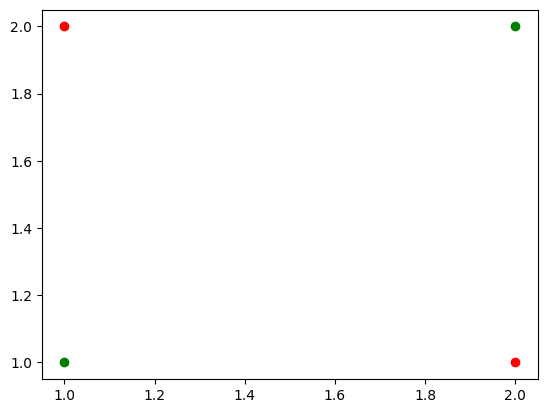

In [223]:
import matplotlib.pyplot as plt

plt.scatter(X_positive[:,0], X_positive[:,1], color='green')
plt.scatter(X_positive[:,0], X_negative[:,1], color='red')
plt.show()

In [224]:
def plot_decision_boundary(X_positive,X_negative,coefficients, constant, iteration):
  plt.figure(figsize=(8,6))
  plt.scatter(X_positive[:, 0], X_positive[:, 1],marker='o', color='green', label='Positive')
  plt.scatter(X_negative[:, 0], X_negative[:, 1],marker='x', color='red', label='Negative')

  x_values = np.linspace(-3, 3, 2)
  if coefficients[1] != 0:
    y_values = -(coefficients[0] * x_values + constant) / coefficients[1]
    plt.plot(x_values, y_values, label=f'Iteration {iteration}')
  else:
    x_value = -constant/coefficients[0]
    plt.axvline(x=x_value, color='blue', linestyle='--', label=f'Iteration {iteration}')

  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.xlim(-3, 3)
  plt.ylim(-4, 4)
  plt.title("Scatter Plot of Points")
  plt.legend()
  plt.grid(True)
  plt.show()

In [225]:
def Perceptron(X, y, epochs=10):
    best_coefficients = np.zeros(X.shape[1])
    best_constant =0
    best_accuracy = 0

    for epoch in range(epochs):
        for i in range(len(X)):
            x = X[i]
            val = np.dot(x, best_coefficients) + best_constant
            #print("Val: "+str(y[i] * val)+" Coeffcients:"+str(best_coefficients)+" Constant:"+str(best_constant)+"  X:"+str(x))
            if y[i] * val <= 0:
                best_coefficients += y[i]*x
                best_constant += y[i]
                break;
            #plot_decision_boundary(best_coefficients, best_constant, epoch)
    return best_coefficients, best_constant

[ 4. -1.]
3


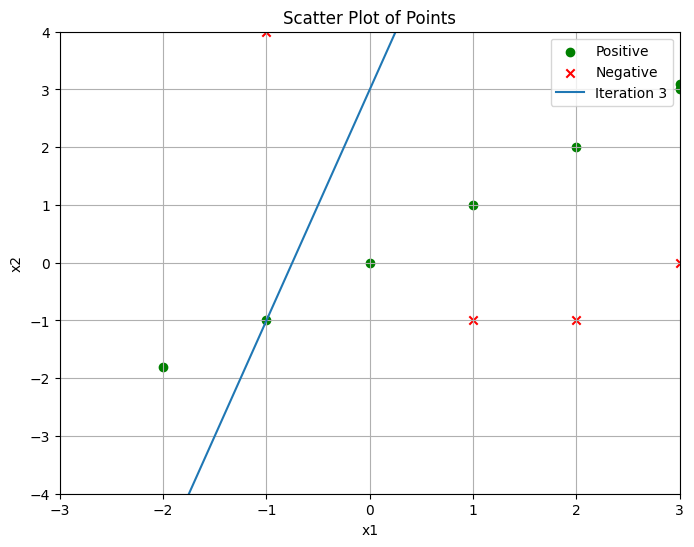

0.0 Point:[-1. -1.]
3.0 Point:[0. 0.]
6.0 Point:[1. 1.]
12.0 Point:[3. 3.]
9.0 Point:[2. 2.]
11.9 Point:[3.  3.1]
-3.2 Point:[-2.  -1.8]
14.0 Point:[4. 5.]
8.0 Point:[ 1. -1.]
12.0 Point:[ 2. -1.]
15.0 Point:[3. 0.]
18.0 Point:[4. 1.]
-5.0 Point:[-1.  4.]
-2.0 Point:[0. 5.]
57.142857142857146


In [282]:
best_coefficients, best_constant = Perceptron(X, y,125)
print(best_coefficients)
print(best_constant)

plot_decision_boundary(test_positive,test_negative,best_coefficients, best_constant, 3)
test_X = np.vstack((test_positive , test_negative))
test_y = np.array([1]*len(test_positive) + [-1]*len(test_negative))

correct = 0
for i in range(len(test_X)):
  val = np.dot(test_X[i], best_coefficients) + best_constant
  if np.sign(val) == test_y[i]:
    correct += 1
  print(str(val)+" Point:"+str(test_X[i]))

print(correct*100/len(test_X))

In [227]:
#Feature engineering
from sklearn.preprocessing import PolynomialFeatures

a = np.array([[2,3],[1,2]])
print(a)
poly = PolynomialFeatures(degree=5)
a_poly = poly.fit_transform(a)
features = poly.get_feature_names_out(['a','b'])
print(a_poly)
print(features)

[[2 3]
 [1 2]]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.  16.  24.  36.  54.
   81.  32.  48.  72. 108. 162. 243.]
 [  1.   1.   2.   1.   2.   4.   1.   2.   4.   8.   1.   2.   4.   8.
   16.   1.   2.   4.   8.  16.  32.]]
['1' 'a' 'b' 'a^2' 'a b' 'b^2' 'a^3' 'a^2 b' 'a b^2' 'b^3' 'a^4' 'a^3 b'
 'a^2 b^2' 'a b^3' 'b^4' 'a^5' 'a^4 b' 'a^3 b^2' 'a^2 b^3' 'a b^4' 'b^5']


In [280]:
from sklearn.preprocessing import PolynomialFeatures

a = np.array(X)
poly = PolynomialFeatures(degree=2)
a_poly = poly.fit_transform(a)

best_coefficients, best_constant = Perceptron(a_poly, y,125)
print(best_coefficients)
print(best_constant)

test_positive = np.array([(-1,-1),(0,0),(1,1),(3,3),(2,2),(3,3.1),(-2,-1.8),(4,5)])
test_negative = np.array([(1,-1),(2,-1),(3,0),(4,1),(-1,4),(0,5)])

test_X = np.vstack((test_positive , test_negative))
test_y = np.array([1]*len(test_positive) + [-1]*len(test_negative))

test_a_poly = poly.fit_transform(test_X)
correct = 0
for i in range(len(test_a_poly)):
  val = np.dot(test_a_poly[i], best_coefficients) + best_constant
  if np.sign(val) == test_y[i]:
    correct += 1
  print("Expected: "+str(test_y[i])+"      "+str(val)+"                  Point:"+str(test_X[i]))
print(correct*100/len(test_X))

[ 5.  1.  1. -7. 23. -7.]
5
Expected: 1      17.0                  Point:[-1. -1.]
Expected: 1      10.0                  Point:[0. 0.]
Expected: 1      21.0                  Point:[1. 1.]
Expected: 1      97.0                  Point:[3. 3.]
Expected: 1      50.0                  Point:[2. 2.]
Expected: 1      99.72999999999999                  Point:[3.  3.1]
Expected: 1      38.32                  Point:[-2.  -1.8]
Expected: 1      192.0                  Point:[4. 5.]
Expected: -1      -27.0                  Point:[ 1. -1.]
Expected: -1      -70.0                  Point:[ 2. -1.]
Expected: -1      -50.0                  Point:[3. 0.]
Expected: -1      -12.0                  Point:[4. 1.]
Expected: -1      -198.0                  Point:[-1.  4.]
Expected: -1      -160.0                  Point:[0. 5.]
100.0


https://openlearninglibrary.mit.edu/assets/courseware/v1/4288137b7bd7f6b7a431b5b6c9f90b85/asset-v1:MITx+6.036+1T2019+type@asset+block/images_feature_representation_1.png